In [3]:
#from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

In [12]:
# Identify files to be preprocessed
csv_path_list = glob.glob('to_corr/*.csv', recursive=True)
csv_list = [file.replace('to_corr\\', '').replace('.csv', '') for file in csv_path_list]

In [13]:
csv_list

['ELECTC_B', 'ELECTP2_C', 'ELECTP_B', 'ELECTP_C', 'PENERC_C']

In [17]:
df_corr_dict={}
for file in csv_path_list:
    filename = file.replace('to_corr\\', '').replace('.csv', '')
    df_corr_dict[filename] = pd.read_csv(file, index_col=0)

In [24]:
df_corr_dict.keys()

dict_keys(['ELECTC_B', 'ELECTP2_C', 'ELECTP_B', 'ELECTP_C', 'PENERC_C'])

In [29]:
# merge them
df_corr = df_corr_dict[csv_list[1]]#pd.DataFrame()
for df_name, df in df_corr_dict.items():
     if (df_name != csv_list[1]):
            df_corr = pd.merge(df_corr, df) # how is this been merged??? e.g. outer
#    df_result = pd.merge(df_result, df, how="outer", on=["Country", "Years"])

In [30]:
df_corr

,Country,Years,Electricity generation from other,Electricity Consumption,Electricity Production,Electricity generation,Primary Energy: Consumption
0,United States,2000.0,NaN,3590.0,4053.0,NaN,9.513879e+09
1,Germany,2000.0,NaN,501.0,577.0,576.556,1.430741e+09
2,China,2000.0,0.003687,1138.0,1356.0,1355.600,4.245316e+09
3,India,2000.0,0.000000,376.0,570.0,NaN,1.334156e+09
4,United States,2001.0,NaN,3554.0,3865.0,NaN,9.289452e+09
...,...,...,...,...,...,...,...
67,India,2016.0,0.104105,1098.0,1463.0,NaN,3.006743e+09
68,United States,2017.0,NaN,3808.0,4251.0,NaN,9.233052e+09
69,Germany,2017.0,267.438000,531.0,653.0,NaN,1.378398e+09
70,China,2017.0,NaN,5683.0,6529.0,NaN,1.308317e+09


In [34]:
# list of years
years = list(df_corr['Years'].unique())
years

[2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 2016.0,
 2017.0]

In [36]:
# list of countries
countries = list(df_corr['Country'].unique())
countries

['United States', 'Germany', 'China', 'India']

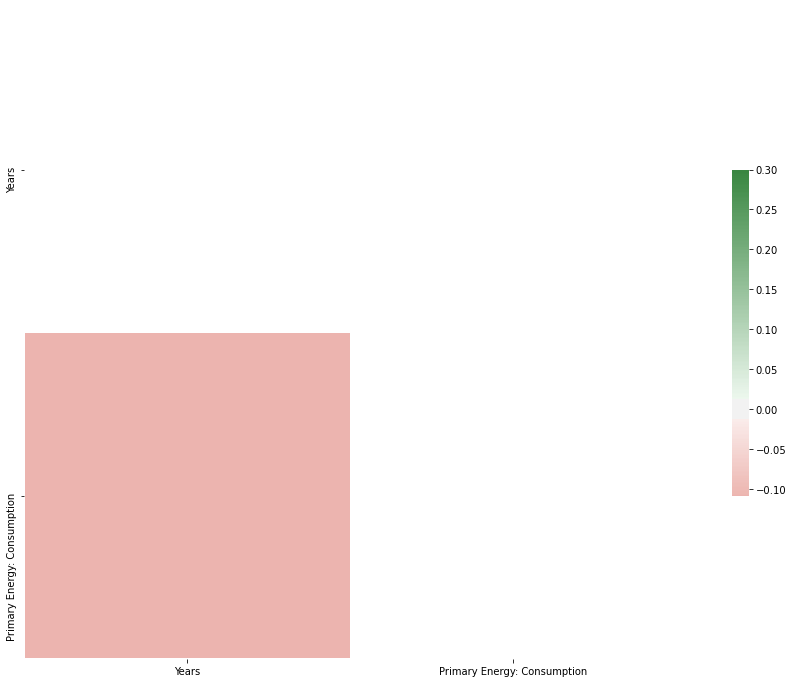

In [33]:
# Compute the correlation matrix
corr = df_corr.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(15, 130, as_cmap=True)

#plt.tight_layout()

# Draw the heatmap with the mask and correct aspect ratio
sns_plot = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Save the figure. must be saved before .show()
fig = sns_plot.get_figure()
fig.savefig("correlogram.png", bbox_inches='tight')



sns_plot